In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Загружаем данные

In [2]:
data = pd.read_csv("sonar.all-data", sep=",", header=None)
data


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Разделяем данные: 70% - обучающая выборка, 30% - тестовая

In [3]:
X = data.drop(60, axis=1)
y = data[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

# Нормируем выборки

In [4]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Создаем логистическую модель

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train_norm, y_train)
log_pred = log_reg.predict(X_test_norm)

[[29  9]
 [ 5 20]]
              precision    recall  f1-score   support

           M       0.85      0.76      0.81        38
           R       0.69      0.80      0.74        25

    accuracy                           0.78        63
   macro avg       0.77      0.78      0.77        63
weighted avg       0.79      0.78      0.78        63



<AxesSubplot:>

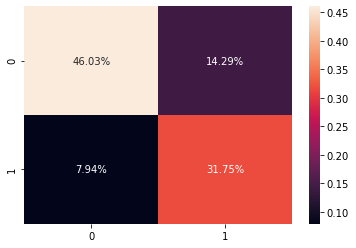

In [6]:
cf_matrix = confusion_matrix(y_test, log_pred)
print(cf_matrix)
print(classification_report(y_test, log_pred))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

# Качество обучения на исходных данных неплохое

# валидационная кривая:

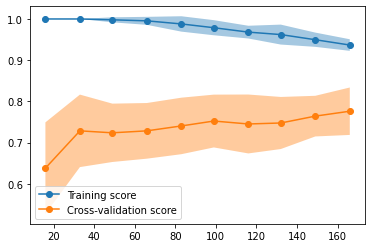

In [7]:
log_reg_lc = LogisticRegression()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#cv = 10
train_sizes, train_scores, test_scores = learning_curve(log_reg_lc, X_scaled, y, cv=cv, train_sizes=np.linspace(0.1, 1., 10), shuffle=False, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.4)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.4)
plt.plot(train_sizes, train_scores_mean, "o-", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# K ближайших соседей

[[36  2]
 [ 9 16]]
              precision    recall  f1-score   support

           M       0.80      0.95      0.87        38
           R       0.89      0.64      0.74        25

    accuracy                           0.83        63
   macro avg       0.84      0.79      0.81        63
weighted avg       0.84      0.83      0.82        63



<AxesSubplot:>

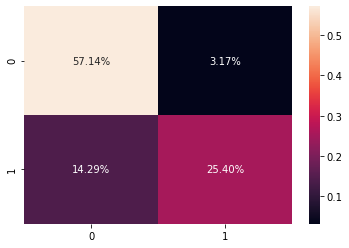

In [8]:
nbrs = KNeighborsClassifier(n_neighbors=2)
nbrs.fit(X_train_norm, y_train)
nbrs_pred = nbrs.predict(X_test_norm)
cf_matrix2 = confusion_matrix(y_test, nbrs_pred)
print(cf_matrix2)
print(classification_report(y_test, nbrs_pred))
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, fmt='.2%')

# качество обучения немного выше, чем у логистической модели

# валидационная кривая:

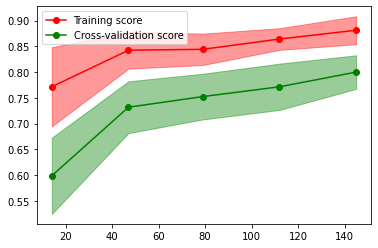

In [9]:
nbrs_lc = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=38)
train_sizes, train_scores, test_scores = learning_curve(nbrs_lc, X_scaled, y, cv=cv, shuffle=False, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.4, color="r",)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.4, color="g",)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# SVC

[[28 10]
 [ 5 20]]
              precision    recall  f1-score   support

           M       0.85      0.74      0.79        38
           R       0.67      0.80      0.73        25

    accuracy                           0.76        63
   macro avg       0.76      0.77      0.76        63
weighted avg       0.78      0.76      0.76        63



<AxesSubplot:>

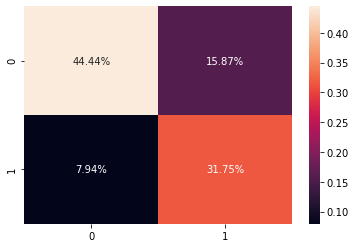

In [10]:
svc = SVC()
svc.fit(X_train_norm, y_train)
svc_pred = svc.predict(X_test_norm)
cf_matrix3 = confusion_matrix(y_test, svc_pred)
print(cf_matrix3)
print(classification_report(y_test, svc_pred))
sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True, fmt='.2%')

# качество классификации ниже, чем у предыдущих моделей

# валидационная кривая:

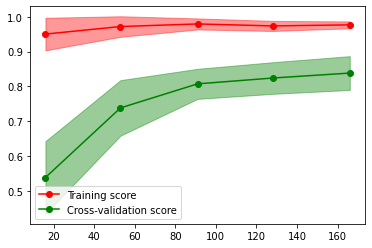

In [11]:
svc_lc = SVC()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#cv = 10
train_sizes, train_scores, test_scores = learning_curve(svc_lc, X_scaled, y, cv=cv, shuffle=False, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.4, color="r",)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.4, color="g",)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# гиперпараметры для каждой модели:

In [12]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
nbrs.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [14]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Так как наивысшее качество было у метода k ближайших соседей, рассмотрим этот метод

# Найдем оптимальные метрики (будем выбирать из Евклидовой, Манхэттонской, Чебышева, Минковского) и оптимальное количество соседей для этих метрик

In [15]:
from sklearn.model_selection import GridSearchCV
num_nbrs = np.arange(2,15)
parameters = {'metric':('euclidean', 'manhattan', 'chebyshev', 'minkowski'), 'n_neighbors':num_nbrs}
nbrs_grid = KNeighborsClassifier()
grid = GridSearchCV(estimator=nbrs_grid, param_grid=parameters, cv=4)
grid.fit(X_train_norm, y_train)
result = grid.cv_results_['mean_test_score'].reshape(4, len(num_nbrs))
print(result)

[[0.76539039 0.77965465 0.73836336 0.75882132 0.74455706 0.74474474
  0.75187688 0.76557808 0.74474474 0.77946697 0.75863363 0.75168919
  0.74455706]
 [0.78603604 0.77984234 0.75206456 0.78678679 0.75882132 0.74493243
  0.71734234 0.73085586 0.73085586 0.76539039 0.76539039 0.76557808
  0.75882132]
 [0.71021021 0.73123123 0.70307808 0.67586336 0.68956456 0.68975225
  0.70345345 0.7240991  0.69613363 0.68243243 0.67548799 0.67567568
  0.64076577]
 [0.76539039 0.77965465 0.73836336 0.75882132 0.74455706 0.74474474
  0.75187688 0.76557808 0.74474474 0.77946697 0.75863363 0.75168919
  0.74455706]]


In [16]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan')

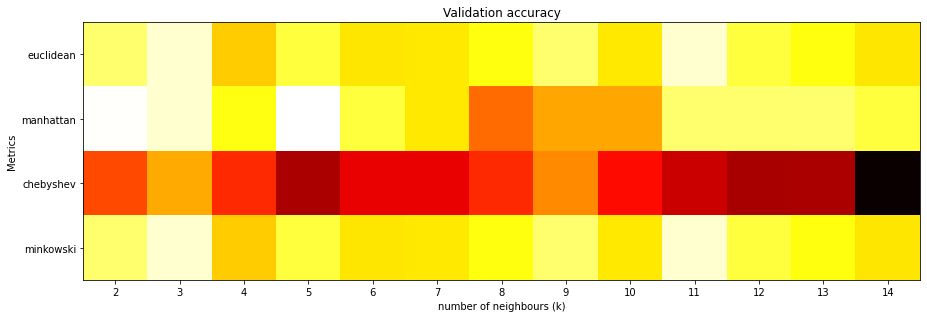

In [17]:
plt.figure(figsize=(15,12))
plt.imshow(result, cmap=plt.cm.hot)
plt.title('Validation accuracy')
plt.xlabel('number of neighbours (k)')
plt.ylabel('Metrics')
plt.xticks(np.arange(len(num_nbrs)), num_nbrs)
plt.yticks(np.arange(4), ['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
plt.show()

# По результатам сравнения наиболее опимальной является Манхэттонская метрика с k = 3

# Создадим модель с оптимальными параметрами ( metric='manhattan', n_neighbors=3)

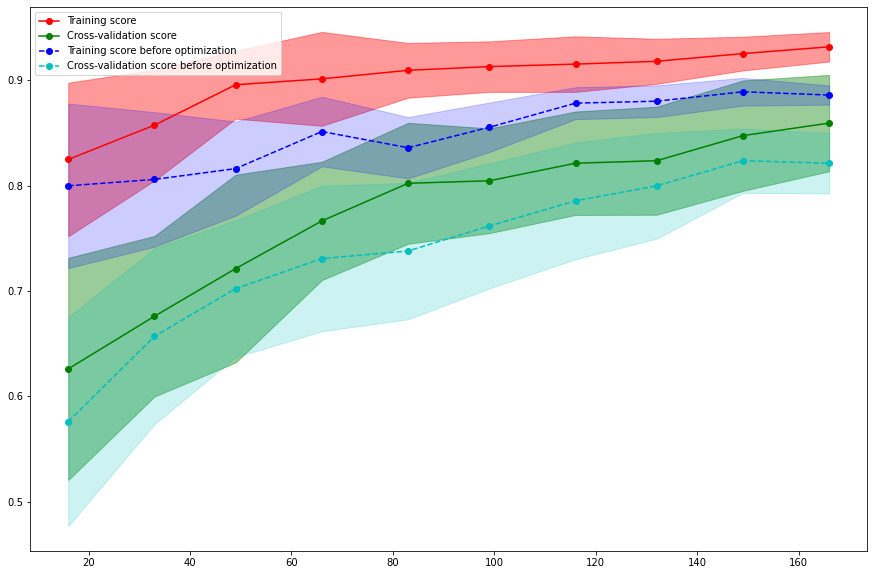

In [18]:
nbrs_lc2 = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#cv = 10
train_sizes, train_scores, test_scores = learning_curve(nbrs_lc2, X_scaled, y, cv=cv, train_sizes=np.linspace(.1, 1., 10), shuffle=False, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(15,10))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.4, color="r",)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.4, color="g",)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")

train_sizes2, train_scores2, test_scores2 = learning_curve(nbrs_lc, X_scaled, y, cv=cv, train_sizes=np.linspace(.1, 1., 10), shuffle=False, scoring='accuracy')
train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)
plt.fill_between(train_sizes2, train_scores_mean2 - train_scores_std2, train_scores_mean2 + train_scores_std2, alpha=0.2, color="b",)
plt.fill_between(train_sizes2, test_scores_mean2 - test_scores_std2, test_scores_mean2 + test_scores_std2, alpha=0.2, color="c",)
plt.plot(train_sizes2, train_scores_mean2, "o--", color="b", label="Training score before optimization")
plt.plot(train_sizes2, test_scores_mean2, "o--", color="c", label="Cross-validation score before optimization")

#plt.rcParams["figure.figsize"] = (18,16)
plt.legend(loc="best")
plt.show()

[[34  4]
 [ 5 20]]
              precision    recall  f1-score   support

           M       0.87      0.89      0.88        38
           R       0.83      0.80      0.82        25

    accuracy                           0.86        63
   macro avg       0.85      0.85      0.85        63
weighted avg       0.86      0.86      0.86        63



<AxesSubplot:>

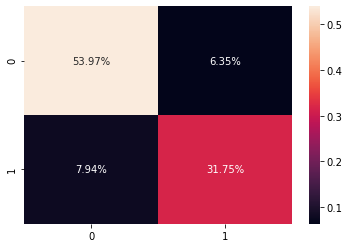

In [19]:
nbrs_lc2.fit(X_train_norm, y_train)
nbrs_lc2_pred = nbrs_lc2.predict(X_test_norm)
cf_matrix4 = confusion_matrix(y_test, nbrs_lc2_pred)
print(cf_matrix4)
print(classification_report(y_test, nbrs_lc2_pred))
sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot=True, fmt='.2%')

# Качество обучения не сильно, но улучшилось, значит в методе k ближайших соседей параметры уже были близки к оптимальным